In [1]:
import numpy as np

In [2]:
from pydbm.cnn.convolutional_1d_neural_network import Convolutional1DNeuralNetwork
from pydbm.cnn.convolutional1dneuralnetwork.convolutional_1d_auto_encoder import Convolutional1DAutoEncoder as ConvolutionalAutoEncoder
from pydbm.cnn.layerablecnn.convolution_1d_layer import Convolution1DLayer as ConvolutionLayer1

In [3]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [4]:
from pydbm.synapse.cnn_1d_graph import CNN1DGraph as ConvGraph1

In [5]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

In [6]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(ERROR)
logger.setLevel(ERROR)
logger.addHandler(handler)

In [7]:
epochs = 300
batch_size = 50
dimension = 5000
scale = 0.1

In [8]:
conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=LogisticFunction(),
        dimension=dimension,
        kernel_size=30,
        scale=scale,
    )
)


opt_params = Adam()
opt_params.weight_limit = 0.0
opt_params.dropout_rate = 0.0

cnn = ConvolutionalAutoEncoder(
    layerable_cnn_list=[
        conv1, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-10,
    learning_attenuate_rate=0.1,
    attenuate_epoch=25,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15,
    save_flag=False
)


Setup CNN layers and the parameters.
Setup Convolutional Auto-Encoder and the parameters.


In [9]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dimension))
observed_arr = (observed_arr - observed_arr.min()) / (observed_arr.max() - observed_arr.min())

In [12]:
cnn.learn(observed_arr=observed_arr)

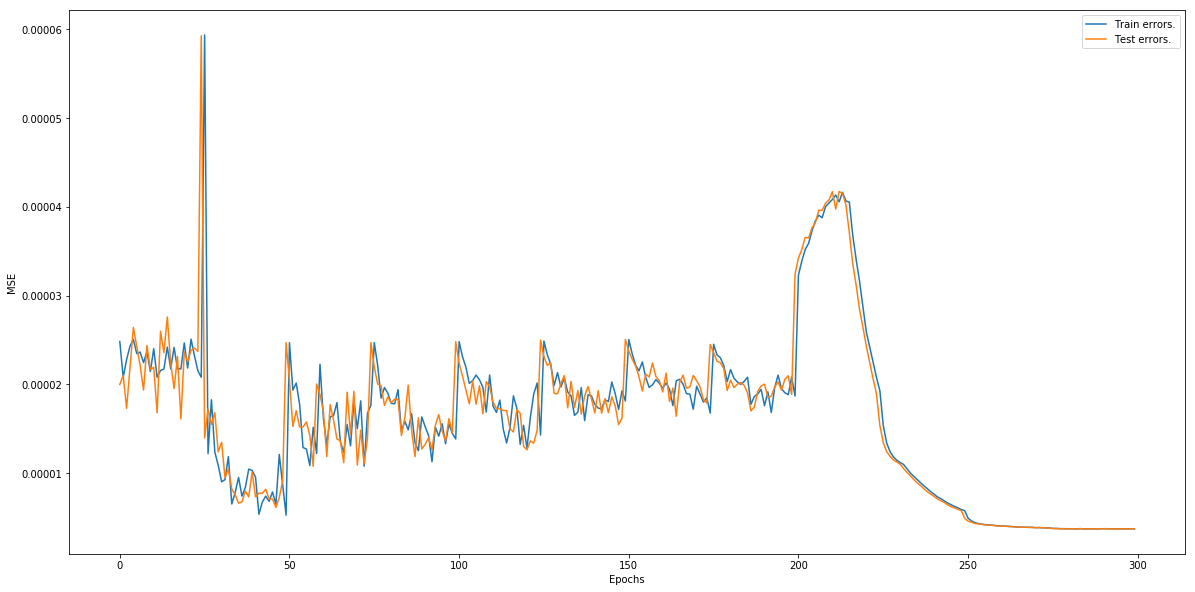

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(cnn.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(cnn.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()